In [1]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
pd.options.display.max_columns = None # Remove pandas display column number limit

In [2]:
fulldata=pd.read_csv('defaultloan.csv',index_col=0)

In [3]:
fulldata.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
def fix_header(data):
    new_header=data.iloc[0]
    data=data[1:]
    data.columns=new_header
    data.rename(columns={'default payment next month':'DEFAULTER'},inplace=True)
    return data
fulldata=fix_header(fulldata)

In [5]:
fulldata.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
fulldata.isnull().values.any()

False

In [7]:
fulldata.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [8]:
fulldata.EDUCATION[fulldata.EDUCATION=='0']='4'
fulldata.EDUCATION[fulldata.EDUCATION=='5']='4'
fulldata.EDUCATION[fulldata.EDUCATION=='6']='4'

fulldata.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [9]:
fulldata.EDUCATION.unique()

array(['2', '1', '3', '4'], dtype=object)

In [10]:
fulldata['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [11]:
fulldata.MARRIAGE[fulldata.MARRIAGE=='0']='3'
fulldata.MARRIAGE.unique()
fulldata.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries

%matplotlib inline

In [13]:
fulldata[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

ID,SEX,EDUCATION,MARRIAGE
count,30000,30000,30000
unique,2,4,3
top,2,2,2
freq,18112,14030,15964


In [14]:
def fix_header(data):
    data.rename(columns={'PAY_0':'PAY_1'},inplace=True)
    return data
fulldata=fix_header(fulldata)

In [15]:
fulldata.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

fulldata=fulldata.astype(float)

In [17]:

fil = (fulldata.PAY_1 ==-2) | (fulldata.PAY_1 ==-1) | (fulldata.PAY_1 ==0)
fulldata.loc[fil, 'PAY_1'] =0

fil = (fulldata.PAY_2 ==-2) | (fulldata.PAY_2 ==-1) | (fulldata.PAY_2 ==0)
fulldata.loc[fil, 'PAY_2'] =0

fil = (fulldata.PAY_3 ==-2) | (fulldata.PAY_3 == -1) | (fulldata.PAY_3 ==0)
fulldata.loc[fil, 'PAY_3'] =0


fil = (fulldata.PAY_4 ==-2) | (fulldata.PAY_4 ==-1) | (fulldata.PAY_4 ==0)
fulldata.loc[fil, 'PAY_4'] =0


fil = (fulldata.PAY_5 ==-2) | (fulldata.PAY_5 == -1) | (fulldata.PAY_5 ==0)
fulldata.loc[fil, 'PAY_5'] =0


fil = (fulldata.PAY_6 ==-2) | (fulldata.PAY_6== -1) | (fulldata.PAY_6 ==0)
fulldata.loc[fil, 'PAY_6'] =0




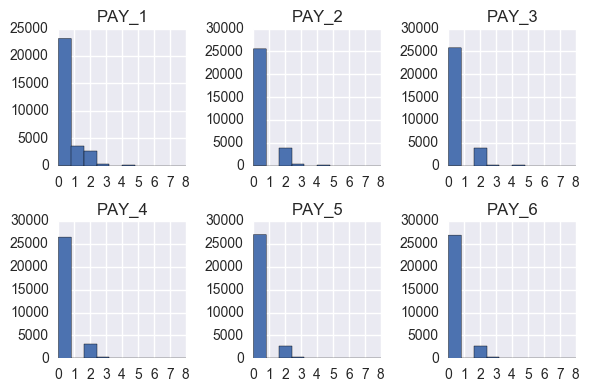

In [18]:

late = fulldata[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [19]:
fulldata['out_bal_apr'] = ((fulldata['BILL_AMT5'] - (fulldata['BILL_AMT6'] - fulldata['PAY_AMT5'])))

fulldata['out_bal_may'] = (fulldata['out_bal_apr'] +(fulldata['BILL_AMT4'] - (fulldata['BILL_AMT5'] - fulldata['PAY_AMT4'])))

fulldata['out_bal_june'] = fulldata['out_bal_may']+(fulldata['BILL_AMT3'] - (fulldata['BILL_AMT4'] - fulldata['PAY_AMT3']))

fulldata['out_bal_july'] =fulldata['out_bal_june']+ (fulldata['BILL_AMT2'] - (fulldata['BILL_AMT3'] - fulldata['PAY_AMT2']))
fulldata['out_bal_aug'] =fulldata['out_bal_july']+ (fulldata['BILL_AMT1'] - (fulldata['BILL_AMT2'] - fulldata['PAY_AMT1']))


In [20]:
outstanding_apr=fulldata['out_bal_apr'].sum()
outstanding_may=fulldata['out_bal_may'].sum()
outstanding_june=fulldata['out_bal_june'].sum()
outstanding_july=fulldata['out_bal_july'].sum()
outstanding_aug=fulldata['out_bal_aug'].sum()


In [21]:
print outstanding_apr
print outstanding_june
print outstanding_aug

187170846.0
689776212.0
1163623815.0


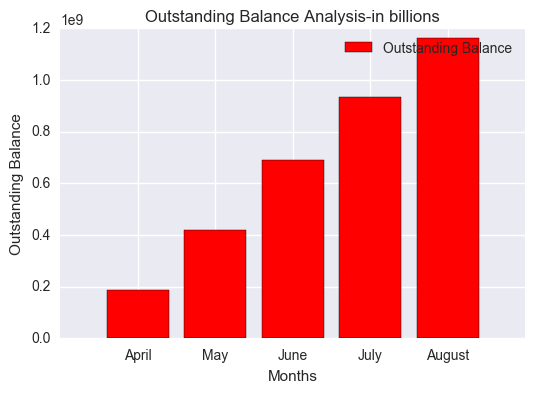

In [22]:
objects = ('April', 'May', 'June', 'July', 'August')
y_pos = np.arange(len(objects))

out_bal = [outstanding_apr,outstanding_may,outstanding_june,outstanding_july,outstanding_aug]
 
#plt.bar(y_pos-0.4,bill_amt,color='r',label="Bill Amount")
plt.bar(y_pos, out_bal,color='r',align='center', alpha=1,label="Outstanding Balance")
plt.xticks(y_pos, objects)
plt.legend()
plt.xlabel('Months')
plt.ylabel('Outstanding Balance')
plt.title('Outstanding Balance Analysis-in billions')
 
plt.show()

In [23]:
fulldata['out_bucket']='0'
fulldata.out_bucket.value_counts()

0    30000
Name: out_bucket, dtype: int64

In [24]:
fulldata.loc[fulldata['out_bal_aug']<=0, 'out_bucket']=1
fulldata.loc[((fulldata['out_bal_aug']>0)&(fulldata['out_bal_aug']<1000)),'out_bucket']=2
fulldata.loc[((fulldata['out_bal_aug']>=1000)&(fulldata['out_bal_aug']<5000)),'out_bucket']=3
fulldata.loc[((fulldata['out_bal_aug']>=5000)&(fulldata['out_bal_aug']<10000)),'out_bucket']=4
fulldata.loc[((fulldata['out_bal_aug']>=10000)&(fulldata['out_bal_aug']<25000)),'out_bucket']=5
fulldata.loc[((fulldata['out_bal_aug']>=25000)&(fulldata['out_bal_aug']<50000)),'out_bucket']=6
fulldata.loc[((fulldata['out_bal_aug']>=50000)&(fulldata['out_bal_aug']<100000)),'out_bucket']=7
fulldata.loc[(fulldata['out_bal_aug']>=100000),'out_bucket']=8
fulldata.out_bucket.value_counts()

5    6126
6    5718
3    5642
7    4187
4    3652
8    2800
1    1210
2     665
Name: out_bucket, dtype: int64

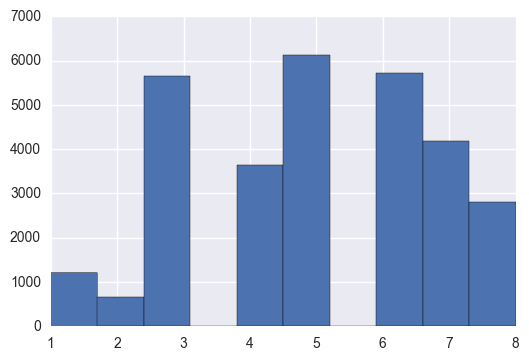

In [25]:

bins = [0,1,2,3,4,5,6,7,8]
bins_names = [1, 2, 3, 4, 5, 6,7,8]
fulldata['out_bucket2'] = pd.cut(fulldata['out_bucket'], bins, labels=bins_names)
fulldata.out_bucket2.hist()

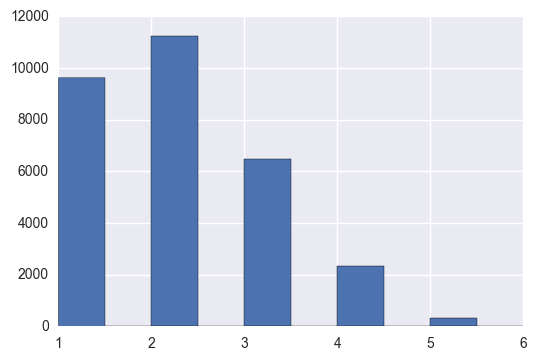

In [26]:
fulldata['AgeBin'] =0 #creates a column of 0
fulldata.loc[((fulldata['AGE'] > 20) & (fulldata['AGE'] < 30)) , 'AgeBin'] = 1
fulldata.loc[((fulldata['AGE'] >= 30) & (fulldata['AGE'] < 40)) , 'AgeBin'] = 2
fulldata.loc[((fulldata['AGE'] >= 40) & (fulldata['AGE'] < 50)) , 'AgeBin'] = 3
fulldata.loc[((fulldata['AGE'] >= 50) & (fulldata['AGE'] < 60)) , 'AgeBin'] = 4
fulldata.loc[((fulldata['AGE'] >= 60) & (fulldata['AGE'] < 70)) , 'AgeBin'] = 5
fulldata.loc[((fulldata['AGE'] >= 70) & (fulldata['AGE'] < 81)) , 'AgeBin'] = 6
fulldata.AgeBin.hist()

In [27]:
def corr_2_cols(Col1, Col2):
    res = fulldata.groupby([Col1, Col2]).size().unstack()
    #res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [28]:

corr_2_cols('out_bucket','AgeBin')


AgeBin,1,2,3,4,5,6
out_bucket,,,,,,
1,325.0,485.0,276.0,93.0,28.0,3.0
2,223.0,274.0,125.0,37.0,6.0,NaN
3,1934.0,1886.0,1231.0,525.0,63.0,3.0
4,1288.0,1308.0,734.0,284.0,37.0,1.0
5,2134.0,2288.0,1232.0,413.0,54.0,5.0
6,1900.0,2110.0,1205.0,440.0,59.0,4.0
7,1208.0,1691.0,927.0,317.0,37.0,7.0
8,606.0,1196.0,734.0,232.0,30.0,2.0


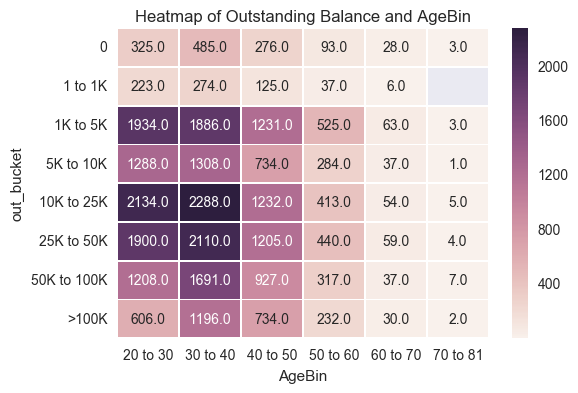

In [29]:
lab=['20 to 30','30 to 40','40 to 50','50 to 60','60 to 70','70 to 81']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'AgeBin')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2,linewidths=.5)
r.set_title("Heatmap of Outstanding Balance and AgeBin")

In [30]:
corr_2_cols('out_bucket','EDUCATION')

EDUCATION,1.0,2.0,3.0,4.0
out_bucket,,,,
1,571,441,183,15
2,263,307,88,7
3,1793,2745,1063,41
4,1219,1730,656,47
5,2183,2896,961,86
6,1858,2806,959,95
7,1534,1933,643,77
8,1164,1172,364,100


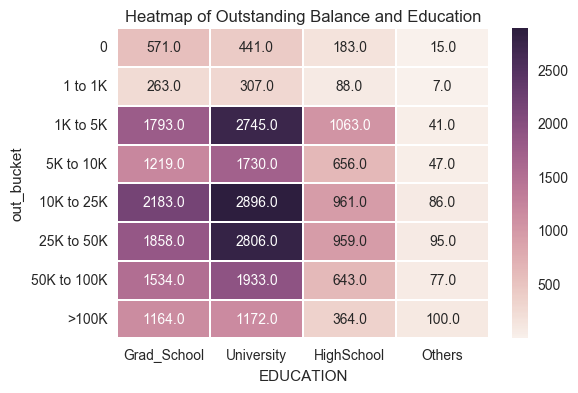

In [31]:
lab=['Grad_School','University','HighSchool','Others']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'EDUCATION')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2, linewidths=.8)
r.set_title("Heatmap of Outstanding Balance and Education")

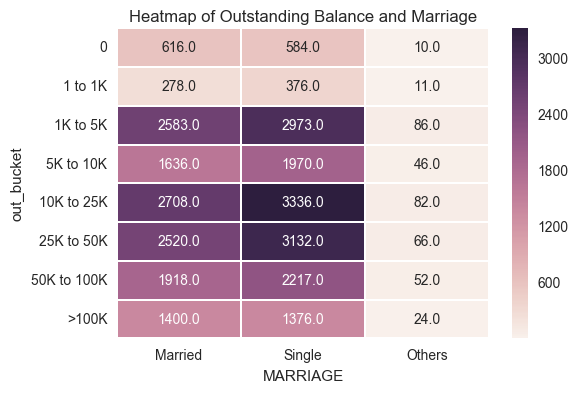

In [32]:
lab=['Married','Single','Others']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'MARRIAGE')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2, linewidths=.8)
r.set_title("Heatmap of Outstanding Balance and Marriage")

In [33]:
df=pd.DataFrame(fulldata,columns=['out_bal_aug','AGE','EDUCATION','MARRIAGE','LIMIT_BAL'])
df.head()

,out_bal_aug,AGE,EDUCATION,MARRIAGE,LIMIT_BAL
1,4602.0,24.0,2.0,1.0,20000.0
2,2421.0,26.0,2.0,2.0,120000.0
3,19708.0,34.0,2.0,2.0,90000.0
4,24831.0,37.0,2.0,1.0,50000.0
5,47856.0,57.0,2.0,1.0,50000.0


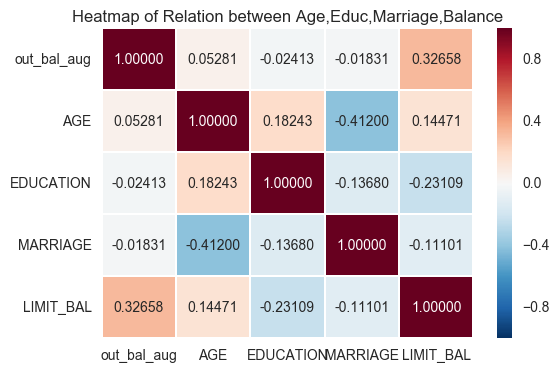

In [34]:
cor = df.corr()
r=sns.heatmap(cor,annot=True,fmt="0.5f",xticklabels=cor.columns.values,yticklabels=cor.columns.values, linewidths=.8)
r.set_title("Heatmap of Relation between Age,Educ,Marriage,Balance")

In [35]:
fulldata['gender_marital']=0
fulldata.loc[((fulldata.SEX == 1) & (fulldata.MARRIAGE == 1)) , 'gender_marital'] = 1 #married man
fulldata.loc[((fulldata.SEX == 1) & (fulldata.MARRIAGE == 2)) , 'gender_marital'] = 2 #single man
fulldata.loc[((fulldata.SEX == 1) & (fulldata.MARRIAGE == 3)) , 'gender_marital'] = 3 #divorced man
fulldata.loc[((fulldata.SEX == 2) & (fulldata.MARRIAGE == 1)) , 'gender_marital'] = 4 #married women
fulldata.loc[((fulldata.SEX == 2) & (fulldata.MARRIAGE == 2)) , 'gender_marital'] = 5 #single women
fulldata.loc[((fulldata.SEX == 2) & (fulldata.MARRIAGE == 3)) , 'gender_marital'] = 6 #divorced women

In [36]:
corr_2_cols('out_bucket','gender_marital')

gender_marital,1,2,3,4,5,6
out_bucket,,,,,,
1,225,237,3,391,347,7
2,86,128,4,192,248,7
3,1025,1302,34,1558,1671,52
4,600,787,16,1036,1183,30
5,955,1280,34,1753,2056,48
6,954,1278,27,1566,1854,39
7,725,920,21,1193,1297,31
8,620,621,6,780,755,18


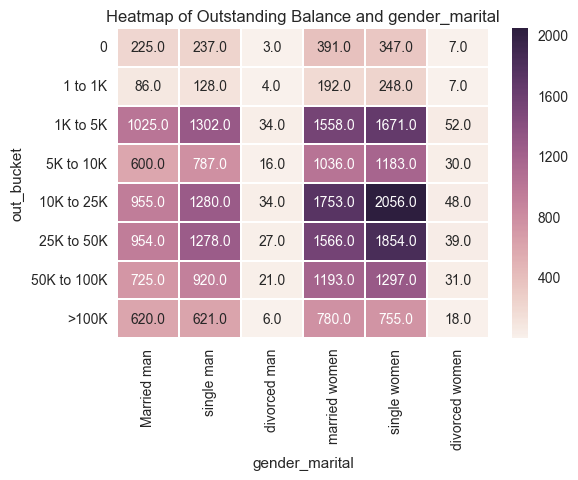

In [37]:
lab=['Married man','single man','divorced man','married women','single women','divorced women']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'gender_marital')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2, linewidths=.8)
r.set_title("Heatmap of Outstanding Balance and gender_marital")

In [38]:
fulldata['gender_agebin'] = 0
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 1)) , 'gender_agebin'] = 1 #man in 20's
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 2)) , 'gender_agebin'] = 2 #man in 30's
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 3)) , 'gender_agebin'] = 3 #man in 40's
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 4)) , 'gender_agebin'] = 4 #man in 50's
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 5)) , 'gender_agebin'] = 5 #man in 60's and above
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 1)) , 'gender_agebin'] = 6 #woman in 20's
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 2)) , 'gender_agebin'] = 7 #woman in 30's
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 3)) , 'gender_agebin'] = 8 #woman in 40's
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 4)) , 'gender_agebin'] = 9 #woman in 50's
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 5)) , 'gender_agebin'] = 10 #woman in 60's and above
corr_2_cols('out_bucket', 'gender_agebin')

gender_agebin,0,1,2,3,4,5,6,7,8,9,10
out_bucket,,,,,,,,,,,
1,3.0,134.0,174.0,99.0,44.0,12.0,191.0,311.0,177.0,49.0,16.0
2,NaN,69.0,91.0,49.0,9.0,NaN,154.0,183.0,76.0,28.0,6.0
3,3.0,747.0,802.0,529.0,243.0,38.0,1187.0,1084.0,702.0,282.0,25.0
4,1.0,420.0,530.0,317.0,120.0,15.0,868.0,778.0,417.0,164.0,22.0
5,5.0,664.0,874.0,515.0,189.0,25.0,1470.0,1414.0,717.0,224.0,29.0
6,4.0,622.0,874.0,512.0,219.0,31.0,1278.0,1236.0,693.0,221.0,28.0
7,7.0,406.0,660.0,417.0,157.0,21.0,802.0,1031.0,510.0,160.0,16.0
8,2.0,219.0,560.0,333.0,111.0,24.0,387.0,636.0,401.0,121.0,6.0


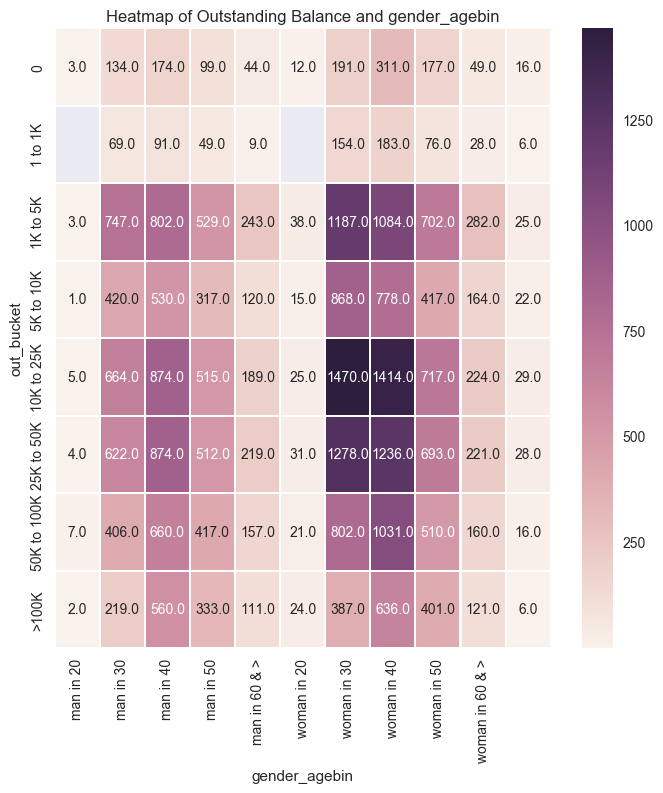

In [39]:
f,ax = plt.subplots(figsize=(8, 8))

lab=['man in 20','man in 30','man in 40','man in 50','man in 60 & >','woman in 20','woman in 30','woman in 40','woman in 50','woman in 60 & >']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'gender_agebin')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2, linewidths=.8,ax=ax)
r.set_title("Heatmap of Outstanding Balance and gender_agebin")

In [40]:

fulldata['Closeness_6'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT6) / fulldata.LIMIT_BAL
fulldata['Closeness_5'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT5) / fulldata.LIMIT_BAL
fulldata['Closeness_4'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT4) / fulldata.LIMIT_BAL
fulldata['Closeness_3'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT3) / fulldata.LIMIT_BAL
fulldata['Closeness_2'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT2) / fulldata.LIMIT_BAL
fulldata['Closeness_1'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT1) / fulldata.LIMIT_BAL
fulldata[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
   'Closeness_1', 'DEFAULTER']].sample(20)

ID,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,DEFAULTER
20944,0.030757,0.502900,0.502571,0.518179,0.528732,0.533754,1.0
26693,0.971540,0.964790,0.948040,0.960050,0.981890,0.982040,1.0
22150,0.993922,0.999203,0.992131,0.999400,0.999400,1.000000,0.0
26888,0.033244,0.058386,0.038811,0.031986,0.057628,0.058356,0.0
21426,0.998928,0.999167,1.000000,0.973944,1.000000,1.000000,1.0
29896,1.000000,1.000000,0.951257,1.000000,0.994783,0.826522,0.0
19607,0.862832,0.847655,0.837991,0.744782,0.563086,0.573568,0.0
19231,0.970530,1.000000,1.000000,1.000000,1.000000,0.989900,0.0
859,0.002546,0.010131,0.019138,-0.015308,-0.028446,-0.008008,0.0
24395,0.193500,0.486000,0.540000,0.589250,0.636150,0.622800,1.0


In [41]:
fulldata.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,out_bucket,out_bucket2,AgeBin,gender_marital,gender_agebin,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,0.0,0.0,0.0,0.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,689.0,3791.0,4602.0,3,3,1,4,6,1.000000,1.000000,1.000000,0.965550,0.844900,0.804350
2,120000.0,2.0,2.0,2.0,26.0,0.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,194.0,1011.0,1421.0,1464.0,2421.0,3,3,1,5,6,0.972825,0.971208,0.972733,0.977650,0.985625,0.977650
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,399.0,782.0,1010.0,2978.0,19708.0,5,5,2,5,7,0.827233,0.833911,0.840767,0.849344,0.844144,0.675122
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,481.0,936.0,23113.0,24074.0,24831.0,5,5,2,4,7,0.409060,0.420820,0.433720,0.014180,0.035340,0.060200
5,50000.0,1.0,2.0,1.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,704.0,11498.0,36393.0,42909.0,47856.0,6,6,4,1,4,0.617380,0.617080,0.581200,0.283300,0.886600,0.827660


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'gender_marital', 'AgeBin', 'gender_agebin', 'out_bal_apr', 'out_bal_may',
            'out_bal_june', 'out_bal_july', 'out_bal_aug', 'Closeness_5',
            'Closeness_4', 'Closeness_3', 'Closeness_2','Closeness_1']
y = fulldata['DEFAULTER'].copy() # target
X = fulldata[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [49]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape


(24000, 34)
(6000, 34)
(24000L,)
(6000L,)


In [50]:


df_train = X_train.join(y_train)
df_train.sample(10)

ID,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,gender_marital,AgeBin,gender_agebin,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,DEFAULTER
12521,200000.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,197272.0,196700.0,194403.0,197746.0,190198.0,192015.0,8600.0,7700.0,11100.0,0.0,5600.0,5640.0,2,2,2,3783.0,11331.0,19088.0,29085.0,38257.0,0.049010,0.011270,0.027985,0.016500,0.013640,1.0
19712,220000.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,0.0,4695.0,4488.0,4283.0,5807.0,5568.0,5827.0,0.0,0.0,1587.0,0.0,500.0,586.0,5,1,6,241.0,480.0,543.0,748.0,955.0,0.974691,0.973605,0.980532,0.979600,0.978659,1.0
7627,410000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27559.0,29866.0,32233.0,34450.0,36954.0,39251.0,3000.0,2800.0,3000.0,3000.0,3000.0,2000.0,1,3,3,703.0,1199.0,1982.0,2415.0,3108.0,0.909868,0.915976,0.921383,0.927156,0.932783,0.0
6631,120000.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,71708.0,72047.0,67080.0,68660.0,69411.0,2855.0,3200.0,3000.0,3700.0,3500.0,1000.0,68074.0,5,2,7,67556.0,70305.0,72425.0,80392.0,83253.0,0.421575,0.427833,0.441000,0.399608,0.402433,0.0
22233,200000.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,148959.0,152810.0,159907.0,168200.0,148987.0,152224.0,6700.0,10000.0,10000.0,4183.0,4465.0,4352.0,5,2,7,1228.0,24624.0,26331.0,29234.0,32083.0,0.255065,0.159000,0.200465,0.235950,0.255205,0.0
26485,100000.0,3.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,117517.0,110537.0,99734.0,99973.0,71008.0,66735.0,4700.0,0.0,3000.0,103000.0,2500.0,3000.0,4,4,9,6773.0,138738.0,141499.0,152302.0,163982.0,0.289920,0.000270,0.002660,-0.105370,-0.175170,1.0
6951,50000.0,3.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,41991.0,42736.0,45821.0,46767.0,45886.0,48701.0,1720.0,3805.0,2000.0,0.0,3581.0,0.0,5,1,6,766.0,1647.0,2701.0,3421.0,4396.0,0.082280,0.064660,0.083580,0.145280,0.160180,0.0
8217,20000.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,16728.0,17759.0,19752.0,19155.0,20385.0,19218.0,1307.0,2300.0,0.0,1525.0,0.0,1000.0,2,2,2,1167.0,1462.0,2059.0,2366.0,2642.0,-0.019250,0.042250,0.012400,0.112050,0.163600,1.0
8563,10000.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4695.0,5719.0,6733.0,7616.0,7779.0,8646.0,1103.0,1117.0,1000.0,286.0,1000.0,200.0,4,2,7,133.0,256.0,373.0,476.0,555.0,0.222100,0.238400,0.326700,0.428100,0.530500,1.0
16516,60000.0,2.0,2.0,1.0,2.0,3.0,2.0,0.0,0.0,58231.0,61671.0,59755.0,58194.0,38649.0,35361.0,5000.0,0.0,198.0,1500.0,1300.0,2000.0,2,1,1,4588.0,25633.0,27392.0,29308.0,30868.0,0.355850,0.030100,0.004083,-0.027850,0.029483,1.0


In [51]:
df_majority = df_train[df_train.DEFAULTER==0]
df_minority = df_train[df_train.DEFAULTER==1]

print(df_majority.DEFAULTER.count())
print("-----------")
print(df_minority.DEFAULTER.count())
print("-----------")
print(df_train.DEFAULTER.value_counts())

18677
-----------
5323
-----------
0.0    18677
1.0     5323
Name: DEFAULTER, dtype: int64


In [52]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18677,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.DEFAULTER.value_counts()

1.0    18677
0.0    18677
Name: DEFAULTER, dtype: int64

In [53]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5323,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.DEFAULTER.value_counts()

1.0    5323
0.0    5323
Name: DEFAULTER, dtype: int64

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced'], 'n_jobs' : [-1]} #use all the computational power you have


In [58]:
acc_scorer = make_scorer(f1_score)



In [63]:
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)


%time grid_forest = grid_forest.fit(X_train, y_train)

In [ ]:
print 5